In [303]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df_restaurants = pd.read_csv('data/processed/processed_restaurants_no_outliers.csv')
df_restaurants_menus = pd.read_csv('data/raw/restaurant-menus.csv')
df_restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60053 entries, 0 to 60052
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             60053 non-null  int64  
 1   position       60053 non-null  int64  
 2   name           60053 non-null  object 
 3   score          33569 non-null  float64
 4   ratings        33569 non-null  float64
 5   category       60035 non-null  object 
 6   price_range    60053 non-null  int64  
 7   full_address   60053 non-null  object 
 8   zip_code       60053 non-null  object 
 9   lat            60053 non-null  float64
 10  lng            60053 non-null  float64
 11  restaurant_id  60053 non-null  float64
 12  avg_price      60053 non-null  float64
 13  price_sum      60053 non-null  float64
 14  price_min      60053 non-null  float64
 15  price_max      60053 non-null  float64
 16  desc_avg_len   60053 non-null  float64
dtypes: float64(10), int64(3), object(4)
memory usage: 

## Which ZIP codes host the most restaurants?

In [304]:
print('there are ', df_restaurants['zip_code'].unique().size, ' unique zip code')
most_used_zip_cods = df_restaurants['zip_code'].value_counts().head(5).reset_index()
most_used_zip_cods

there are  2413  unique zip code


,zip_code,count
0,75034,318
1,77494,215
2,77004,215
3,77057,205
4,75080,182


Text(0, 0.5, 'count')

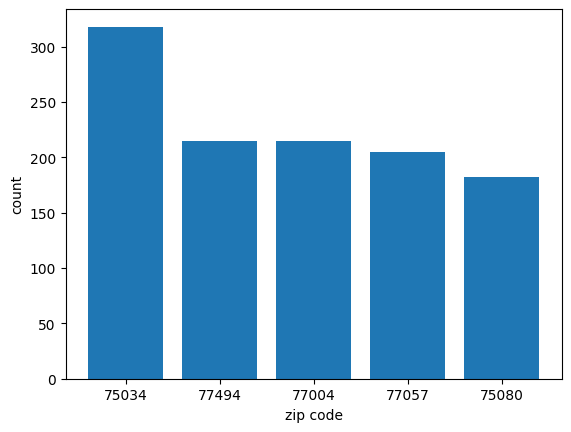

In [305]:
plt.bar(most_used_zip_cods['zip_code'], most_used_zip_cods['count'])
plt.xlabel('zip code')
plt.ylabel('count')

## How are restaurants distributed geographically?
using `Latitude` and `Longitude` we can calculate and And distribute the position on a map

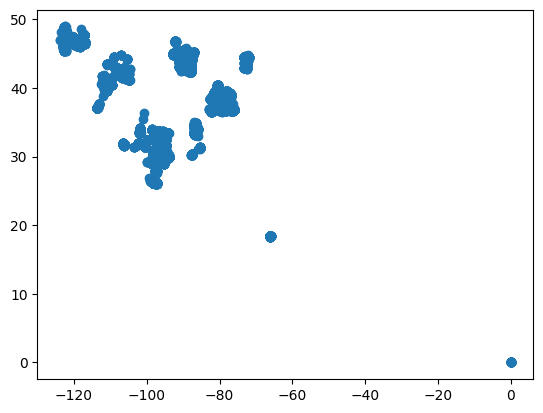

In [306]:
plt.scatter(df_restaurants['lng'], df_restaurants['lat'])

## To make the visualization more clear we can cut the same part from the map

In [307]:
print('max Longitude', df_restaurants['lng'].max())
print('min Longitude', df_restaurants['lng'].min())
print('max Latitude', df_restaurants['lat'].max())
print('min Latitude', df_restaurants['lat'].min())


max Longitude 0.0
min Longitude -123.84124
max Latitude 48.96395
min Latitude 0.0


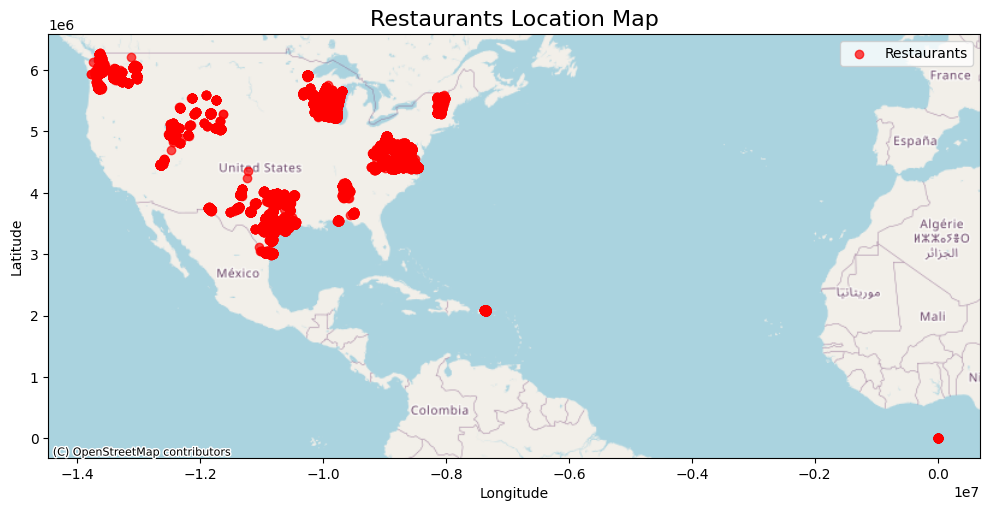

In [308]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

# Convert your DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(
    df_restaurants,
    geometry=gpd.points_from_xy(df_restaurants['lng'], df_restaurants['lat']),
    crs="EPSG:4326"  # WGS84 for lat/lon
)

# Reproject to Web Mercator for plotting with contextily
gdf = gdf.to_crs(epsg=3857)

# Plot with background map
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax, marker='o', color='red', alpha=0.7, label="Restaurants")
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Format the plot
ax.set_title("Restaurants Location Map", fontsize=16)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend()
plt.tight_layout()
plt.show()


# Is there a relationship between geographic position and review ratings?

To answer this question, we first need to categorize the data based on latitude and longitude.

Here are the updated geographic categories:

| Category Number | Latitude Range | Longitude Range  | Description                     |
|-----------------|----------------|------------------|---------------------------------|
| 1               | 45 to 50       | -150 to -110     | Far Northwest                   |
| 2               | 35 to 45       | -120 to -100     | Western to Central US           |
| 3               | 25 to 38       | -110 to -90      | Southern Central                |
| 4               | 28 to 38       | -90 to -80       | Lower Eastern US                |
| 5               | 35 to 45       | -90 to -70       | Central to Eastern              |
| 6               | 40 to 50       | -100 to -80      | Midwest                         |
| 7               | 40 to 47       | -80 to -60       | Northeast                       |
| 8               | Anything else  | Outside America  | Out of defined region           |

### categorys on image
![Restaurant-category-distribution](img/Restaurant-category-distribution.png)

Text(0, 0.5, 'count')

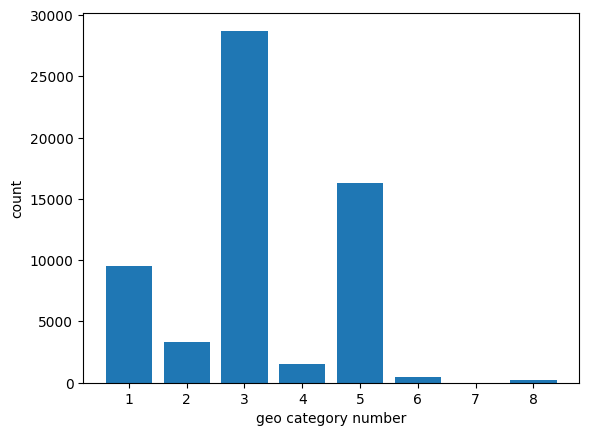

In [309]:
def get_category(lat, lng):
    if 45 <= lat <= 50 and -150 <= lng <= -110:
        return 1
    elif 35 <= lat <= 45 and -120 <= lng <= -100:
        return 2
    elif 25 <= lat <= 38 and -110 <= lng <= -90:
        return 3
    elif 28 <= lat <= 38 and -90 <= lng <= -80:
        return 4
    elif 35 <= lat <= 45 and -90 <= lng <= -70:
        return 5
    elif 40 <= lat <= 50 and -100 <= lng <= -80:
        return 6
    elif 40 <= lat <= 47 and -80 <= lng <= -60:
        return 7
    else:
        return 8  # Anything else, outside defined range


df_restaurants['geo_category'] = df_restaurants.apply(lambda row: get_category(row['lat'], row['lng']), axis=1)

category_counts = df_restaurants['geo_category'].value_counts().reset_index()

plt.bar(category_counts['geo_category'], category_counts['count'])
plt.xlabel('geo category number')
plt.ylabel('count')

In [310]:
df_restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60053 entries, 0 to 60052
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             60053 non-null  int64  
 1   position       60053 non-null  int64  
 2   name           60053 non-null  object 
 3   score          33569 non-null  float64
 4   ratings        33569 non-null  float64
 5   category       60035 non-null  object 
 6   price_range    60053 non-null  int64  
 7   full_address   60053 non-null  object 
 8   zip_code       60053 non-null  object 
 9   lat            60053 non-null  float64
 10  lng            60053 non-null  float64
 11  restaurant_id  60053 non-null  float64
 12  avg_price      60053 non-null  float64
 13  price_sum      60053 non-null  float64
 14  price_min      60053 non-null  float64
 15  price_max      60053 non-null  float64
 16  desc_avg_len   60053 non-null  float64
 17  geo_category   60053 non-null  int64  
dtypes: flo

### category `3` is the most frequent category

# Now we are ready to start answring on the question
## `Is there a relationship between geographic position and review ratings?`

In [311]:
# print(df_restaurants.isnull().sum())
# print(df_restaurants_droped_null.isnull().sum())
df_restaurants_droped_null = df_restaurants.dropna(subset=['score', 'ratings'])

print(df_restaurants_droped_null['score'].corr(df_restaurants_droped_null['ratings']))
geo_cat_per_score_mean = df_restaurants_droped_null.groupby('geo_category')[['ratings', 'score']].mean().reset_index()
geo_cat_per_score_mean.columns = ['geo_category', 'ratings_count_mean', 'score_mean']
geo_cat_per_score_mean

0.1819645371481703


,geo_category,ratings_count_mean,score_mean
0,1,76.494982,4.596989
1,2,42.887873,4.505180
2,3,75.877498,4.530349
3,4,45.553064,4.494619
4,5,81.226698,4.564666
5,6,39.633333,4.470833
6,8,171.250000,4.680000


Text(0, 0.5, 'Average  ratings count')

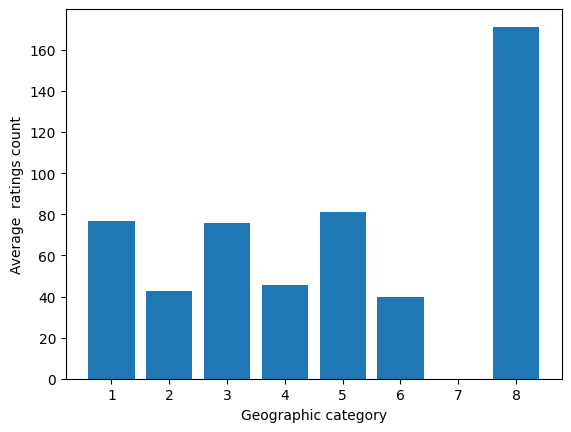

In [312]:
plt.bar(geo_cat_per_score_mean['geo_category'], geo_cat_per_score_mean['ratings_count_mean'])
plt.xlabel('Geographic category')
plt.ylabel('Average  ratings count')

Text(0, 0.5, 'Average  score')

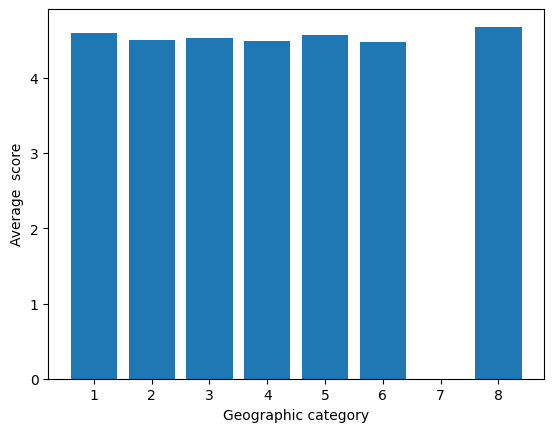

In [313]:
plt.bar(geo_cat_per_score_mean['geo_category'], geo_cat_per_score_mean['score_mean'])
plt.xlabel('Geographic category')
plt.ylabel('Average  score')

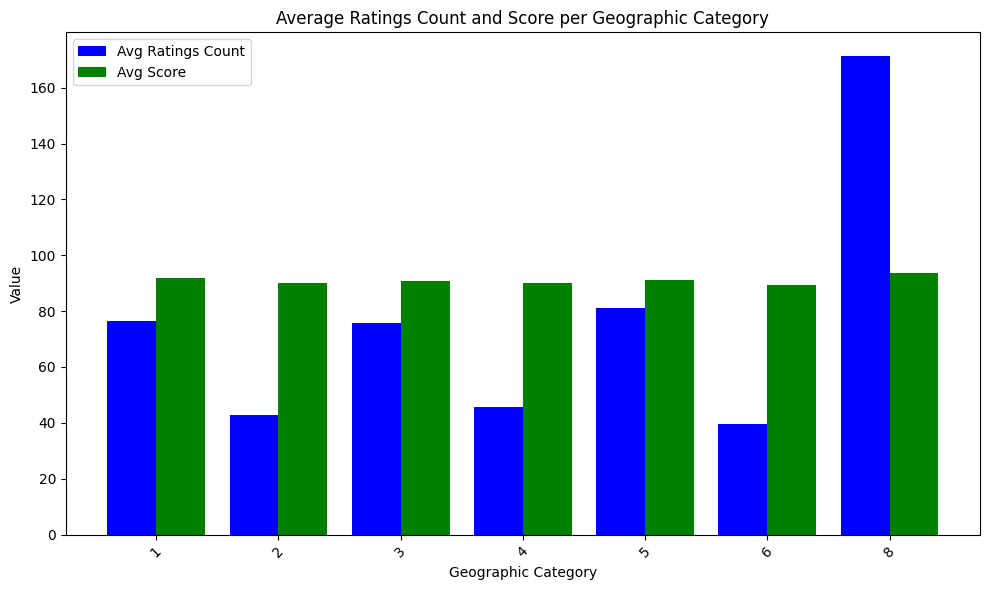

In [314]:

# Assuming geo_cat_per_score_mean is a DataFrame
labels = geo_cat_per_score_mean['geo_category']
x = np.arange(len(labels))  # the label locations
width = 0.4  # width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Blue bars for ratings count
bars1 = ax.bar(x - width / 2, geo_cat_per_score_mean['ratings_count_mean'] / 100 * 100, width,
               label='Avg Ratings Count', color='blue')

# Green bars for score
bars2 = ax.bar(x + width / 2, geo_cat_per_score_mean['score_mean'] / 5 * 100, width, label='Avg Score', color='green')

# Labels and title
ax.set_xlabel('Geographic Category')
ax.set_ylabel('Value')
ax.set_title('Average Ratings Count and Score per Geographic Category')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

# Does description length correlate with menu price?

In [315]:
removed_zero_desc = df_restaurants[df_restaurants['desc_avg_len'] != 0.0]
removed_zero_desc['avg_price'].corr(removed_zero_desc['desc_avg_len'])


np.float64(0.13740314831075767)

### there are week postive coraltion between description length and price

## count most common word in description from over all menu

<BarContainer object of 5 artists>

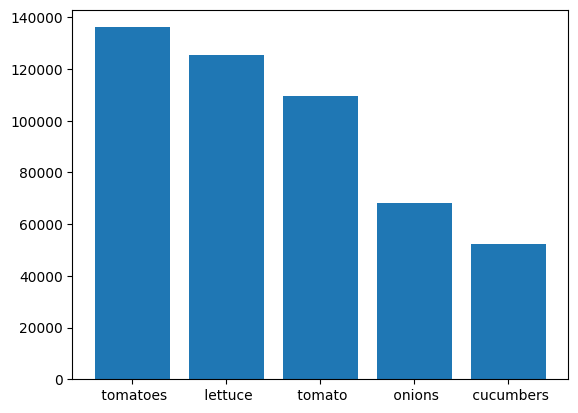

In [316]:
non_null_descriptions = df_restaurants_menus['description'].dropna()

all_words = non_null_descriptions.str.split(',', expand=True).stack()
word_counts = all_words.str.lower().value_counts()
most_common_words = word_counts.head(5)
plt.bar(most_common_words.index, most_common_words.values)


## 🧠 Insights احم احم
### How does price range correlate with customer ratings?

### Do restaurants with few ratings ever display high scores?

### Which restaurants have the highest scores overall?

### What is the average menu price by price category?

### Do menu prices vary more within cheap or expensive restaurants?


### Start with Price range correlation with Customer ratings

In [317]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/processed/processed_restaurants_no_outliers.csv')

# Remove NaN from score 3shan n7sb sa7
df_valid = df[df['score'].notna()].copy()



## Visualize Scores by Price Range with Boxplot

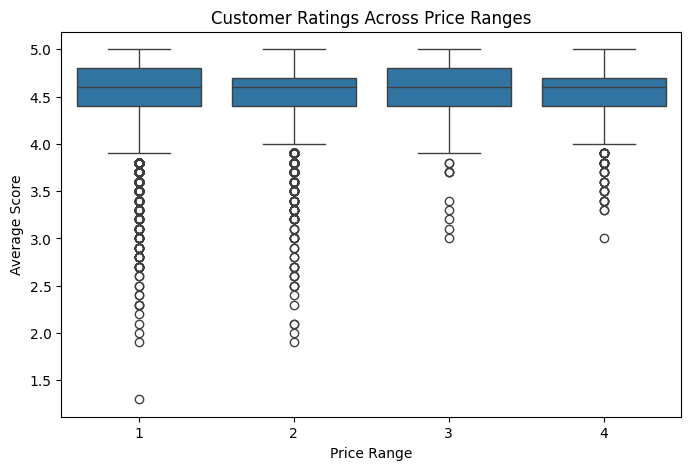

In [318]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_valid, x='price_range', y='score', order=['1', '2', '3', '4'])
plt.title('Customer Ratings Across Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Average Score')
plt.show()

# Describe scores per group

In [319]:
df_valid.groupby('price_range')['score'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
price_range,,,,,,,,
1,25449.0,4.56,0.30,1.3,4.4,4.6,4.8,5.0
2,6927.0,4.51,0.32,1.9,4.4,4.6,4.7,5.0
3,187.0,4.55,0.35,3.0,4.4,4.6,4.8,5.0
4,1006.0,4.55,0.29,3.0,4.4,4.6,4.7,5.0


# CORELLATION ANALYSIS

In [320]:
correlation = df_valid[['price_range', 'score']].corr().iloc[0, 1]
print(f"Correlation between price level and average score: {correlation:.3f}")

if correlation > -0.05 and correlation < 0.05:
    print("No or very weak correlation between price level and average score.")
elif correlation > 0.05:
    print("Positive correlation between price level and average score.")


Correlation between price level and average score: -0.037
No or very weak correlation between price level and average score.


# -----------------------

## Do restaurants with few ratings ever display high average scores?

### We want to detect potential bias where restaurants with low count of ratings has high scores
###    for reasons like family/friends members rating the restaurants with bias

### First we Filter out the restaurants with few ratings but high scores
###     lets say <20 ratings is low with a score of > 4.5 is reason to believe there is bias

In [321]:
df_few_high = df_valid[  ## few عشان few count ratings و high عشان high score
    (df_valid['ratings'] <= 25) &
    (df_valid['score'] >= 4.5)
    ]


## Show the sample

In [322]:
df_few_high[['name', 'score', 'ratings', 'price_range']].sort_values(by='score', ascending=False)


,name,score,ratings,price_range
402,Great American Cookies (Riverchase Galleria),5.0,14.0,1
14,Jeni's Splendid Ice Cream (Pepper Place),5.0,20.0,3
233,"Honey Baked Ham (7001 Crestwood Blvd, Ste 114)",5.0,11.0,1
149,Wasabi Juan's (Downtown),5.0,11.0,1
15133,Walgreens (585 Gage Blvd),5.0,12.0,1
...,...,...,...,...
18079,Auntie Anne's (1100 South Hayes St),4.5,22.0,1
17726,Papa Johns (2227 Valley Avenue),4.5,25.0,1
17761,Kephi Greek Kitchen,4.5,23.0,4
26084,KFC (1101 W. Pembroke Ave.),4.5,15.0,1


# Plot it

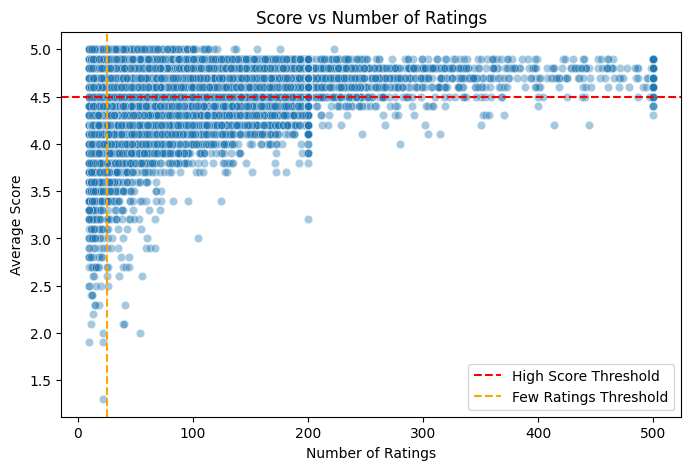

In [323]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_valid, x='ratings', y='score', alpha=0.4)
plt.axhline(4.5, color='red', linestyle='--', label='High Score Threshold')
plt.axvline(25, color='orange', linestyle='--', label='Few Ratings Threshold')
plt.title('Score vs Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Average Score')
plt.legend()
plt.show()

### We found that 5454 restaurants had a score ≥ 4.5 but only 20 or fewer ratings.

### This suggests some bias but might not be reliable due to a small sample size.


### Save our findings in a csv file

In [324]:
df_few_high.to_csv('data/processed/few_ratings_high_score.csv', index=False)


# Which restaurants have the highest scores overall?

### first we sort by score and ratings to get overall highest rated restaurant

In [325]:
df_top_sorted = df_valid.sort_values(by=['score', 'ratings'],
                                     ascending=[False, False])


### Now we Show the top 10 of data

In [326]:
df_top_sorted[['name', 'score', 'ratings', 'price_range']].head(10)


,name,score,ratings,price_range
17579,Starbucks (S. Van Dorn and Pickett),5.0,223.0,1
27184,Sundevich,5.0,176.0,1
22030,Berries &amp; Bowls,5.0,156.0,1
21813,Starbucks (South Riding Blvd),5.0,137.0,1
18997,Open Road (ROSSLYN),5.0,136.0,1
41751,Delightful Donut,5.0,121.0,1
45062,Smoothie King (5000 Belt Line Road),5.0,118.0,1
33661,Cafe Vida (Rogers Ranch),5.0,114.0,1
59647,Purify Bowls &amp; Smoothies,5.0,113.0,1
11456,Banh Mi Up,5.0,112.0,1


## Plot for top 10

C:\Users\youse\AppData\Local\Temp\ipykernel_20748\3522478887.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, y='name', x='ratings', palette='coolwarm')


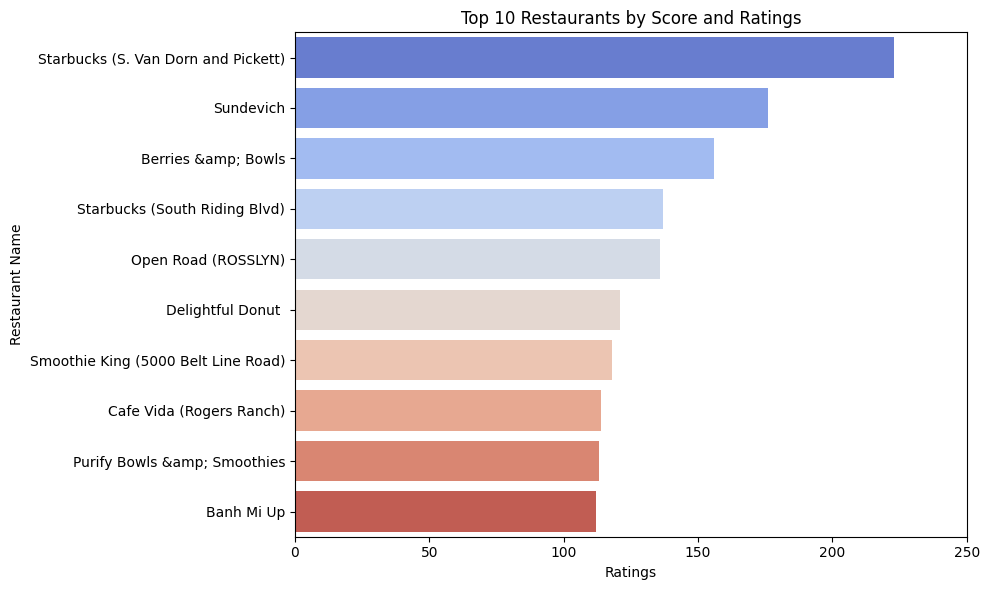

In [327]:
top_10 = df_top_sorted.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_10, y='name', x='ratings', palette='coolwarm')
plt.title('Top 10 Restaurants by Score and Ratings')
plt.xlabel('Ratings')
plt.ylabel('Restaurant Name')
plt.xlim(0, 250)
plt.tight_layout()
plt.show()


# -------------------------------------------------------------

# Do menu prices vary more within cheaper or more expensive restaurants?

## Create a column for price range spread to see the price differenece for each restaurant

In [328]:
df_restaurants['price_spread'] = df_restaurants['price_max'] - df_restaurants['price_min']


 ## Group by price_range and check average spread and plot

In [329]:
df_restaurants.groupby('price_range')['price_spread'].describe().round(2)


,count,mean,std,min,25%,50%,75%,max
price_range,,,,,,,,
1,44059.0,26.78,31.39,0.0,11.90,17.0,28.79,1048.71
2,14002.0,28.67,31.61,0.0,11.25,18.0,35.50,448.50
3,338.0,38.51,22.11,0.0,26.96,35.0,45.01,191.00
4,1654.0,64.70,37.16,26.0,41.00,53.3,74.28,373.71


# ?????? ايه الهبل ده

## remove extreme outliers

In [330]:
Q1 = df_restaurants['price_spread'].quantile(0.25)
Q3 = df_restaurants['price_spread'].quantile(0.75)
IQR = Q3 - Q1

lower = max(0, Q1 - 1.5 * IQR)
upper = Q3 + 1.5 * IQR

df_spread_clean = df_restaurants[
    (df_restaurants['price_spread'] >= lower) &
    (df_restaurants['price_spread'] <= upper)
]


## try again

In [331]:
df_spread_clean.groupby('price_range')['price_spread'].describe().round(2)


,count,mean,std,min,25%,50%,75%,max
price_range,,,,,,,,
1,40827.0,20.01,13.06,0.0,11.34,16.30,25.19,64.57
2,12710.0,20.86,14.24,0.0,10.50,16.20,29.00,64.54
3,312.0,33.90,13.23,0.0,26.00,34.00,43.00,64.50
4,1096.0,45.68,9.05,26.0,37.94,44.05,53.00,64.50


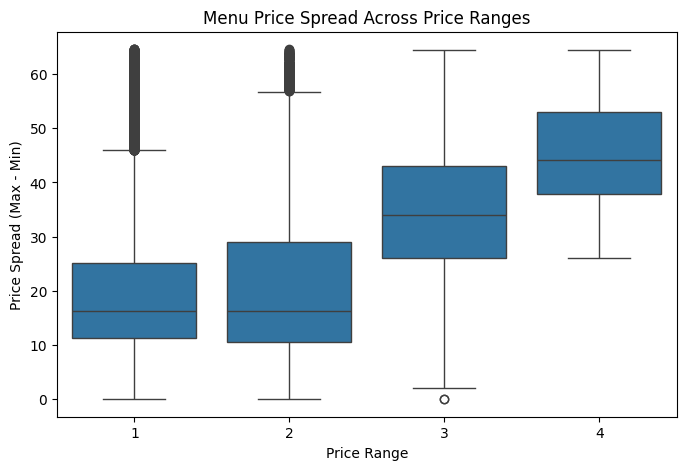

In [332]:

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_spread_clean, x='price_range', y='price_spread')
plt.title('Menu Price Spread Across Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Price Spread (Max - Min)')
plt.show()

## As we can see the mean spread increases by order of category ...   يعني في higher price difference in higher categories

# ---------------------------------------------

# What is the average menu price by price category?


### Group by price_range

In [333]:
df_restaurants.groupby('price_range')['avg_price'].describe().round(2)


,count,mean,std,min,25%,50%,75%,max
price_range,,,,,,,,
1,44059.0,8.87,3.69,0.02,6.06,8.44,11.31,20.61
2,14002.0,9.78,3.82,0.31,7.17,9.62,12.00,20.60
3,338.0,14.22,3.68,2.81,12.07,14.29,16.92,20.53
4,1654.0,12.67,3.37,1.35,10.39,12.46,14.93,20.61


### Insight: Average Menu Price by Restaurant Tier

### - Tier 1 (cheap): $8.87  
### - Tier 2 (moderate): $9.78  
### - Tier 3 (expensive): $14.22  
### - Tier 4 (luxury): $12.67
